In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier                        
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score  

#  Data Exploration and Data Analysis

In [3]:
dt= pd.read_csv("diabetes.csv")

In [28]:
dt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(dt)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [6]:
print(dt.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
dt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='BMI', ylabel='Count'>

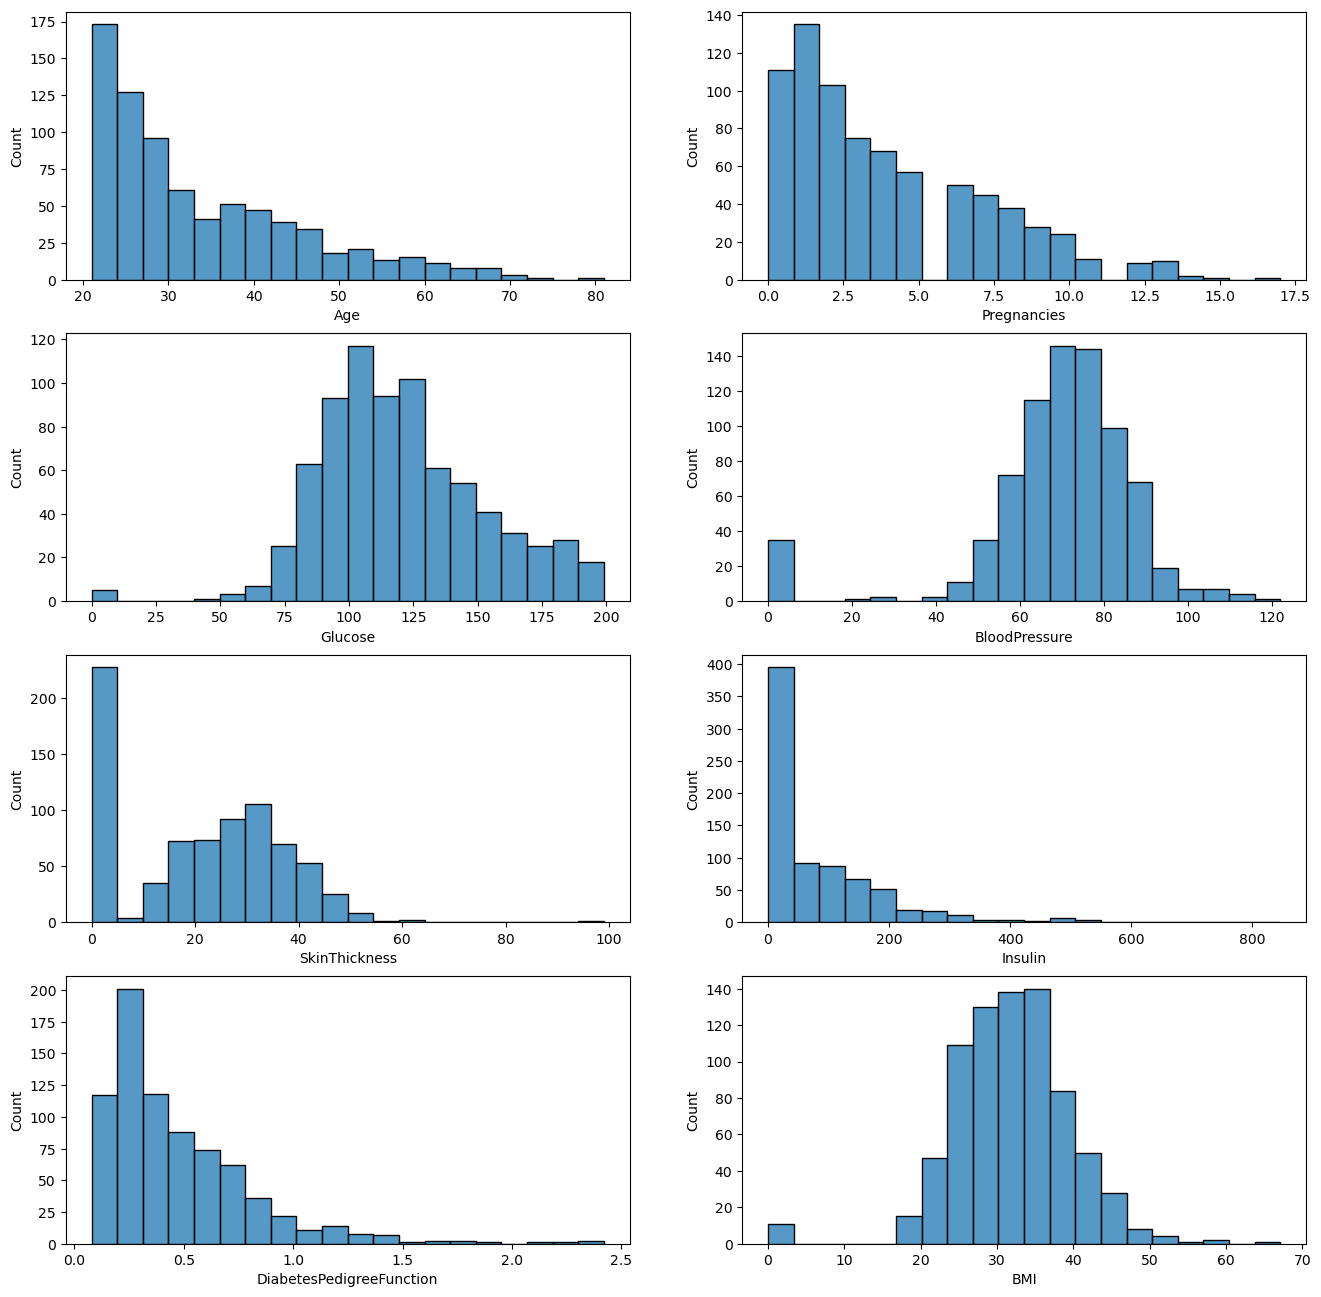

In [9]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(dt.Age, bins = 20, ax=ax[0,0]) 
sns.histplot(dt.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.histplot(dt.Glucose, bins = 20, ax=ax[1,0]) 
sns.histplot(dt.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.histplot(dt.SkinThickness, bins = 20, ax=ax[2,0])
sns.histplot(dt.Insulin, bins = 20, ax=ax[2,1])
sns.histplot(dt.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.histplot(dt.BMI, bins = 20, ax=ax[3,1]) 

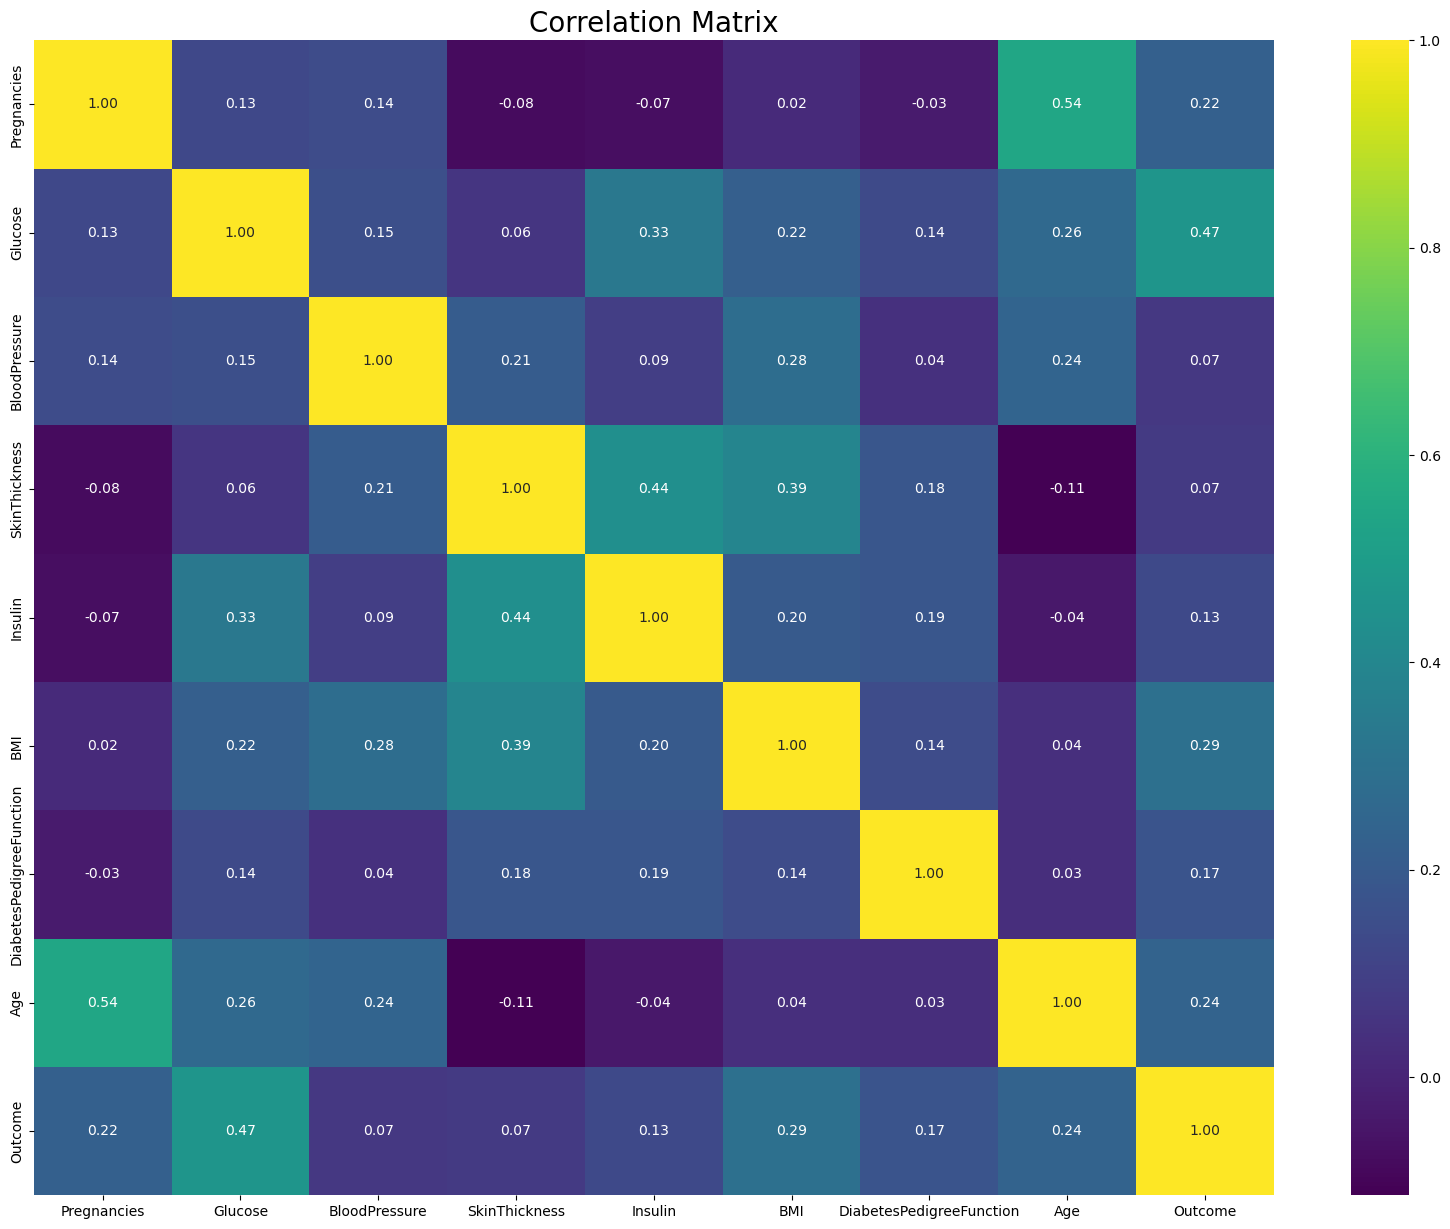

In [10]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(dt.corr(), annot=True, fmt=".2f", ax=ax, cmap = "viridis" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# Data Preprocessing

In [11]:
dt.isnull().values.any()

False

In [12]:
dt.corr()['Outcome'].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

In [14]:
dt.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Outlier Observation 

In [19]:
#outlier observation.
for column in dt:
    
    l = dt[column].quantile(0.25)
    u = dt[column].quantile(0.75)
    lu = u-l
    upper = u + 1.5*lu
    
    if dt[(dt[column] > upper)].any(axis=None):
        print(column,"yes")
    else:
        print(column, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


# Multiple Ensemble Model Training

In [24]:
from sklearn.model_selection import train_test_split
X = dt[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = dt['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [25]:
n_estimators = 20
base_models = []
base_models_ab = []
base_models_gb = []
base_models_bagging = []
base_models_extra_trees = []
base_models_xgboost = []

In [26]:
#Random Forest
for i in range(n_estimators):
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, Y_train)
    base_models.append(rf)

# Create and train AdaBoost models
for i in range(n_estimators):
    ab = AdaBoostClassifier(n_estimators=100)
    ab.fit(X_train, Y_train)
    base_models_ab.append(ab)

# Create and train Gradient Boosting models
for i in range(n_estimators):
    gb = GradientBoostingClassifier(n_estimators=100)
    gb.fit(X_train, Y_train)
    base_models_gb.append(gb)

# Create and train Bagging models
for i in range(n_estimators):
    bagging = BaggingClassifier(n_estimators=100)
    bagging.fit(X_train, Y_train)
    base_models_bagging.append(bagging)

# Create and train Extra Trees models
for i in range(n_estimators):
    extra_trees = ExtraTreesClassifier(n_estimators=100)
    extra_trees.fit(X_train, Y_train)
    base_models_extra_trees.append(extra_trees)

# Create and train XGBoost models
for i in range(n_estimators):
    xgboost = XGBClassifier(n_estimators=100)
    xgboost.fit(X_train, Y_train)
    base_models_xgboost.append(xgboost)

# Create and train Voting Classifier models
voting_classifier = VotingClassifier(estimators=[
    ('rf', base_models[0]),
    ('ab', base_models_ab[0]),
    ('gb', base_models_gb[0]),
], voting='soft')
voting_classifier.fit(X_train, Y_train)


# Create and train Stacking Classifier models
stacking_classifier = StackingClassifier(estimators=[
    ('rf', base_models[0]),
    ('ab', base_models_ab[0]),
    ('gb', base_models_gb[0]),
], final_estimator=LogisticRegression())
stacking_classifier.fit(X_train, Y_train)

#CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=100,  # Number of boosting iterations (adjust as needed)
                                    learning_rate=0.1,  # Learning rate (adjust as needed)
                                    depth=6,  # Depth of the trees (adjust as needed)
                                    random_state=42)  # Random seed for reproducibility

catboost_model.fit(X_train, Y_train)

#PassiveAggressiveClassifier
pa_classifier = PassiveAggressiveClassifier(C=1.0, random_state=42)
pa_classifier.fit(X_train, Y_train)


0:	learn: 0.6695050	total: 90.7ms	remaining: 8.98s
1:	learn: 0.6450329	total: 92.5ms	remaining: 4.53s
2:	learn: 0.6251942	total: 94.1ms	remaining: 3.04s
3:	learn: 0.6059856	total: 95.9ms	remaining: 2.3s
4:	learn: 0.5897653	total: 97.8ms	remaining: 1.86s
5:	learn: 0.5758387	total: 99ms	remaining: 1.55s
6:	learn: 0.5625842	total: 100ms	remaining: 1.33s
7:	learn: 0.5507601	total: 102ms	remaining: 1.17s
8:	learn: 0.5423382	total: 103ms	remaining: 1.04s
9:	learn: 0.5331097	total: 106ms	remaining: 950ms
10:	learn: 0.5231618	total: 108ms	remaining: 877ms
11:	learn: 0.5146196	total: 111ms	remaining: 816ms
12:	learn: 0.5081859	total: 114ms	remaining: 763ms
13:	learn: 0.5017689	total: 116ms	remaining: 713ms
14:	learn: 0.4958561	total: 118ms	remaining: 669ms
15:	learn: 0.4897434	total: 120ms	remaining: 632ms
16:	learn: 0.4847054	total: 123ms	remaining: 601ms
17:	learn: 0.4788116	total: 125ms	remaining: 570ms
18:	learn: 0.4734726	total: 127ms	remaining: 541ms
19:	learn: 0.4687904	total: 128ms	rema

PassiveAggressiveClassifier(random_state=42)

In [27]:
predictions = [model.predict(X_test) for model in base_models]
ensemble_predictions = np.round(np.mean(predictions, axis=0))
ensemble_accuracy = accuracy_score(Y_test, ensemble_predictions)
print(f"Accuracy for Random Forest: {ensemble_accuracy}")

predictions = [model.predict(X_test) for model in base_models_ab]
ensemble_predictions = np.round(np.mean(predictions, axis=0))
ensemble_accuracy = accuracy_score(Y_test, ensemble_predictions)
print(f"Accuracy for AdaBoost: {ensemble_accuracy}")

predictions = [model.predict(X_test) for model in base_models_gb]
ensemble_predictions = np.round(np.mean(predictions, axis=0))
ensemble_accuracy = accuracy_score(Y_test, ensemble_predictions)
print(f"Accuracy for Gradient Boosting: {ensemble_accuracy}")

predictions = [model.predict(X_test) for model in base_models_bagging]
ensemble_predictions = np.round(np.mean(predictions, axis=0))
ensemble_accuracy = accuracy_score(Y_test, ensemble_predictions)
print(f"Accuracy for Bagging: {ensemble_accuracy}")

predictions = [model.predict(X_test) for model in base_models_extra_trees]
ensemble_predictions = np.round(np.mean(predictions, axis=0))
ensemble_accuracy = accuracy_score(Y_test, ensemble_predictions)
print(f"Accuracy for Extre Trees: {ensemble_accuracy}")

predictions = [model.predict(X_test) for model in base_models_xgboost]
ensemble_predictions = np.round(np.mean(predictions, axis=0))
ensemble_accuracy = accuracy_score(Y_test, ensemble_predictions)
print(f"Accuracy for XG Boost: {ensemble_accuracy}")

predictions = voting_classifier.predict(X_test)
ensemble_accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy for Voting: {ensemble_accuracy}")

predictions = stacking_classifier.predict(X_test)
ensemble_accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy for Stacking: {ensemble_accuracy}")

predictions = catboost_model.predict(X_test)
ensemble_accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy for Cat Boost Model: {ensemble_accuracy}")

predictions = pa_classifier.predict(X_test)
ensemble_accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy for Passive Aggressive: {ensemble_accuracy}")

Accuracy for Random Forest: 0.7792207792207793
Accuracy for AdaBoost: 0.7532467532467533
Accuracy for Gradient Boosting: 0.7835497835497836
Accuracy for Bagging: 0.7792207792207793
Accuracy for Extre Trees: 0.7619047619047619
Accuracy for XG Boost: 0.7619047619047619
Accuracy for Voting: 0.7835497835497836
Accuracy for Stacking: 0.7835497835497836
Accuracy for Cat Boost Model: 0.7835497835497836
Accuracy for Passive Aggressive: 0.33766233766233766
